In [29]:
import warnings
warnings.filterwarnings('ignore')

In [101]:
from config import gkey
import gmaps
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [119]:
analysisdata = pd.read_csv("analysisdata.csv")[["Country","2016","Disaster rate","Internet Access Rate"]]
analysisOECDdata = pd.read_csv("analysisOECDdata.csv")[["Country","2016","Disaster rate","Internet Access Rate","Average Sleeping (Hours)"]]
location= pd.read_csv("../Xuan Code/country-capitals.csv")[["CountryName","CapitalLatitude","CapitalLongitude"]]
location.columns=[["Country","Lat","Lng"]]
location.to_csv("coordinate.csv")
newlocation = pd.read_csv("coordinate.csv")[["Country","Lat","Lng"]]
analysisdata_location = pd.merge(analysisdata,newlocation,on = "Country")


In [120]:
gmaps.configure(api_key = gkey)
locations = analysisdata_location[["Lat","Lng"]]
happiness = analysisdata_location["2016"]
internet = analysisdata_location["Internet Access Rate"]
disaster = analysisdata_location["Disaster rate"]
country = analysisdata_location["Country"]


In [121]:
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=happiness, 
                                 dissipating=False, max_intensity=10,
                                 point_radius = 2)
happiness_layer = gmaps.symbol_layer(locations, fill_color='rgba(0, 150, 0, 0.4)',
                                    stroke_color='rgba(0, 0, 150, 0.4)', scale=2,
                                    info_box_content=[f"Happiness Score: {score}" for score in happiness])
fig.add_layer(heat_layer)
fig.add_layer(happiness_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [124]:
happiness_layer = gmaps.symbol_layer(
    locations, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=2,
    info_box_content=[f"Happiness Score: {score}" for score in happiness]
)
fig = gmaps.figure()
fig.add_layer(happiness_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [125]:
from matplotlib.cm import viridis
from matplotlib.cm import RdBu
from matplotlib.cm import jet
from matplotlib.colors import to_hex

In [126]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

In [127]:
def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

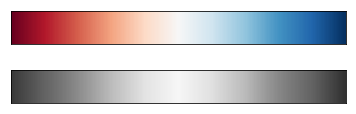

In [128]:
view_colormap(RdBu)

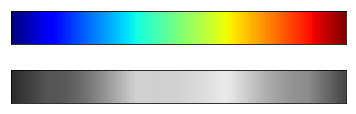

In [129]:
view_colormap(jet)

In [141]:
import gmaps
import gmaps.geojson_geometries
#colors = happiness
gmaps.configure(api_key=gkey)

countries_geojson = gmaps.geojson_geometries.load_geometry("countries")
fig = gmaps.figure()

gini_layer = gmaps.geojson_layer(countries_geojson,fill_color='rgba(100, 150, 0, 0.4)',stroke_color='rgba(0, 0, 150, 0.4)')
fig.add_layer(gini_layer)
fig


Figure(layout=FigureLayout(height='420px'))

In [130]:
import json
>>> import requests
>>> countries_string = requests.get(
    "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"
).content
>>> countries = json.loads(countries_string)

In [133]:
import gmaps.datasets
rows = gmaps.datasets.load_dataset('gini') # 'rows' is a list of tuples
country2gini = dict(rows) # dictionary mapping 'country' -> gini coefficient
print(country2gini['United Kingdom'])


32.4


In [200]:
from matplotlib.cm import viridis
from matplotlib.colors import to_hex

# We will need to scale the GINI values to lie between 0 and 1
min_gini = min(country2gini.values())
max_gini = max(country2gini.values())
gini_range = max_gini - min_gini

def calculate_color(gini):
    """
    Convert the GINI coefficient to a color
    """
    # make gini a number between 0 and 1
    normalized_gini = (gini - min_gini) / gini_range

    # invert gini so that high inequality gives dark color
    inverse_gini = 1.0 - normalized_gini

    # transform the gini coefficient to a matplotlib color
    mpl_color = viridis(inverse_gini)

    # transform from a matplotlib color to a valid CSS color
    gmaps_color = to_hex(mpl_color, keep_alpha=False)

    return gmaps_color


In [199]:
country_name

'Zimbabwe'

In [201]:
colors = []
for feature in countries_geojson['features']:
    country_name = feature['properties']['name']
    try:
        gini = country2gini[country_name]
        color = calculate_color(gini)
    except KeyError:
        # no GINI for that country: return default color
        color = (0, 0, 0, 0.3)
    colors.append(color)

In [202]:
fig = gmaps.figure()
gini_layer = gmaps.geojson_layer(
countries_geojson,
fill_color=colors,
stroke_color=colors,
fill_opacity=0.8)
fig.add_layer(gini_layer)
fig


Figure(layout=FigureLayout(height='420px'))

In [203]:
len(colors)

217

In [205]:
calculate_color(6)

'#fde725'

In [206]:
colors

[(0, 0, 0, 0.3),
 (0, 0, 0, 0.3),
 '#a5db36',
 (0, 0, 0, 0.3),
 (0, 0, 0, 0.3),
 (0, 0, 0, 0.3),
 '#27808e',
 '#8ed645',
 (0, 0, 0, 0.3),
 (0, 0, 0, 0.3),
 (0, 0, 0, 0.3),
 (0, 0, 0, 0.3),
 '#8ed645',
 '#a0da39',
 '#5ac864',
 '#1f948c',
 '#dae319',
 '#37b878',
 '#21a685',
 '#70cf57',
 '#42be71',
 (0, 0, 0, 0.3),
 (0, 0, 0, 0.3),
 '#3aba76',
 '#d0e11c',
 (0, 0, 0, 0.3),
 '#297a8e',
 '#38588c',
 (0, 0, 0, 0.3),
 (0, 0, 0, 0.3),
 '#25ac82',
 '#481467',
 '#460b5e',
 '#70cf57',
 '#aadc32',
 '#39568c',
 '#2a788e',
 '#1f9a8a',
 '#24878e',
 (0, 0, 0, 0.3),
 (0, 0, 0, 0.3),
 (0, 0, 0, 0.3),
 '#3d4d8a',
 (0, 0, 0, 0.3),
 (0, 0, 0, 0.3),
 '#33638d',
 (0, 0, 0, 0.3),
 (0, 0, 0, 0.3),
 (0, 0, 0, 0.3),
 (0, 0, 0, 0.3),
 '#4ac16d',
 '#ece51b',
 '#c8e020',
 '#1f9e89',
 (0, 0, 0, 0.3),
 '#ece51b',
 '#2a778e',
 '#44bf70',
 '#2e6f8e',
 '#86d549',
 (0, 0, 0, 0.3),
 '#3dbc74',
 '#40bd72',
 '#63cb5f',
 '#cae11f',
 (0, 0, 0, 0.3),
 (0, 0, 0, 0.3),
 '#90d743',
 (0, 0, 0, 0.3),
 (0, 0, 0, 0.3),
 (0, 0, 0, 0.3)